In [1]:
from pprint import pprint
import math
import statistics as st

from statsmodels.stats.multitest import fdrcorrection as fdr
import scipy.stats
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
DATA_LOC = "cleanData_comma.csv"
df = pd.read_csv(DATA_LOC)

In [143]:
def prepare_data(df, peaks):
    data = {}
    for peak in peaks:
        N24 = [i for i in df["N24_"+str(peak)].values if not np.isnan(i)] 
        N48 = [i for i in df["N48_"+str(peak)].values if not np.isnan(i)]
        AD = [i for i in df["AD_"+str(peak)].values if not np.isnan(i)]      
        data[peak] = {
            "N24": N24, 
            "N48": N48,
            "AD": AD,
            "means": [st.mean(i) for i in [N24, N48, AD]] 
        }
    return data

def prepare_box(pos: tuple, data: dict, xlabels: list, title: str, ax, lines=False):
    plot_data = [
        data["N24"],
        data["N48"],
        data["AD"],
    ]
    plot_means = data["means"]
    box_p = ax[pos[0], pos[1]].boxplot(plot_data, labels=labels, patch_artist=True)
    if lines:
        ax[pos[0], pos[1]].plot([1,2,3], plot_means,c="r", alpha=1, lw=3,zorder=5)
    ax[pos[0], pos[1]].set_title("F"+title, fontweight="bold")
    if pos[1] == 0:
        ax[pos[0], pos[1]].set_ylabel("% AUC")
    colors = ['yellow', 'lightgreen', 'lightblue']
    for patch, color in zip(box_p['boxes'], colors):
        patch.set_facecolor(color)

def shift_pos(cur_pos):
    if cur_pos[1] == 1:  #col
        pos_row = cur_pos[0] + 1
        pos_col = 0
        return (pos_row, pos_col)
    else: 
        pos_col = 1
        return(cur_pos[0], pos_col)


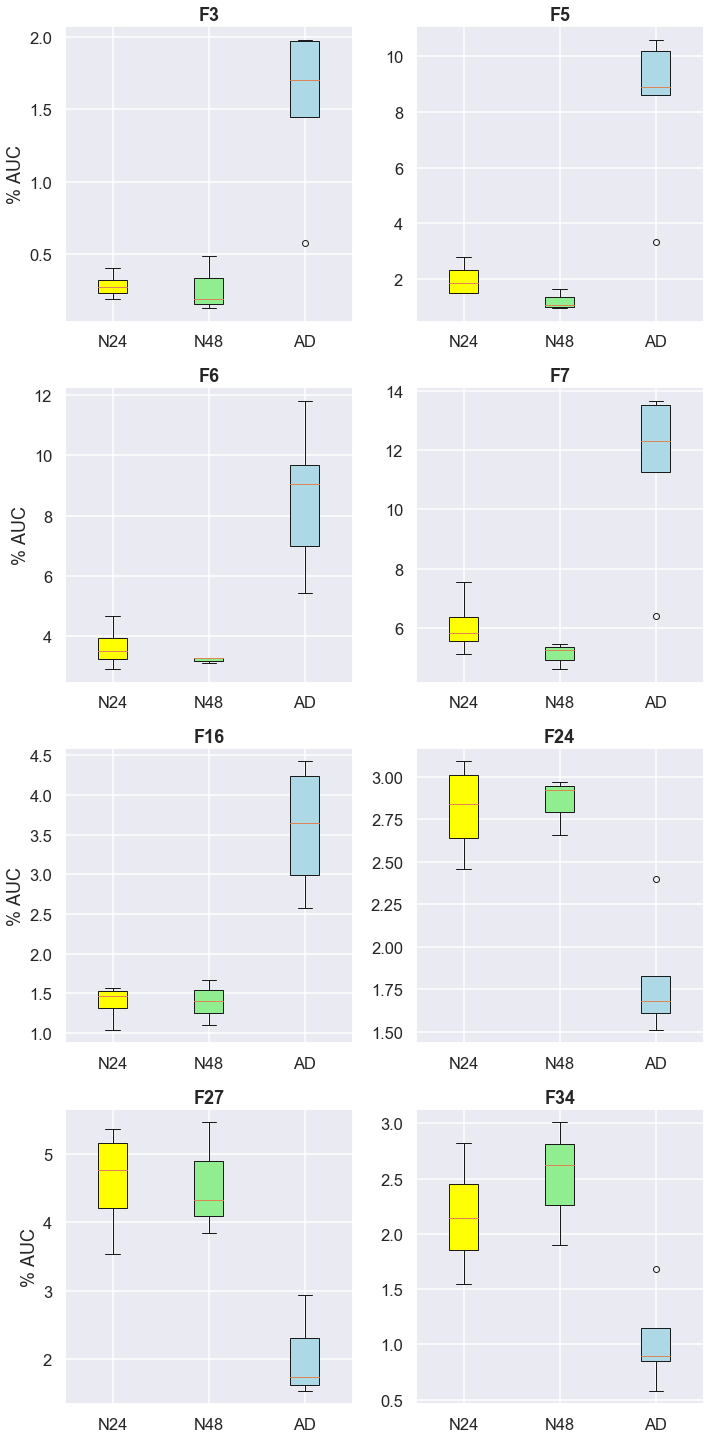

In [144]:
significant_differences = [3, 5, 6, 7, 16, 24, 27, 34]
labels = ["N24", "N48", "AD"]
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))

prepared_data = prepare_data(df, significant_differences)

position = (0,0)
for i in sig_peaks:
    prepare_box(pos=position, data=prepared_data[i], xlabels=labels, title=str(i), ax=axis)
    position = shift_pos(position)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()
fig.savefig("boxplots_no_lines.pdf")

